# Estudo de vazões no rio Paranapanema
A finalidade do estudo visa caracterizar o regime de um rio, identificar possíveis tendências ao longo 
dos anos, determinar o comportamento sazonal das vazões, as curvas de permanência e definir vazões de estatística.

Os dados foram retirados do Operador Nacional do Sistema Elétrico (ONS) com vazões médias diárias ao longo de uma série histórica de 30 anos, de 1984 até o ano de 2013. A série escolhida para análise é retirada da usina hidrelétrica de Taquaruçu no rio paranapanema, da bacia hidrográfica de paranapanema, na divisa entre os estados de São Paulo e Paraná.

Estudo realizado para a disciplina de Obras Hidraulicas do curso de engenharia sanitária e ambiental da Universidade Federal de Santa Catarina.

In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime 
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
#Acessando o arquivo com as séries históricas
dados = pd.read_excel('testet1.xlsx')

In [3]:
#Apresentando os dados
dados.head()

,ANO,MES,DIA,DATA,ROSAL (196),SANTA BRANCA (122),CAPIVARA (61),CAMARGOS (1),CANOAS II (51),TAQUARUCU (62),CANOAS I (52),EDGARD DE SOUZA+TRIBUT (161),L.N. GARCEZ (50)
0,1984,1,1,1984-01-01,61.566232,66.409736,38.560343,97.625835,58.719384,36.506731,58.581798,45.699259,58.980443
1,1984,1,2,1984-01-02,58.860024,58.292991,41.108595,90.482482,55.232747,39.161353,55.923822,58.314159,54.578075
2,1984,1,3,1984-01-03,56.830368,50.545188,40.820113,92.625488,51.192677,40.023538,51.830538,60.456311,50.627232
3,1984,1,4,1984-01-04,52.771056,47.593644,37.839139,103.578630,49.975121,38.049588,50.235752,33.322376,49.780623
4,1984,1,5,1984-01-05,50.741400,47.593644,36.637134,106.435972,49.311000,36.211772,49.438360,40.224869,49.272657


In [4]:
#Colunas
dados.columns

Index(['ANO', 'MES', 'DIA', 'DATA', 'ROSAL (196)', 'SANTA BRANCA (122)',
       'CAPIVARA (61)', 'CAMARGOS (1)', 'CANOAS II (51)', 'TAQUARUCU (62)',
       'CANOAS I (52)', 'EDGARD DE SOUZA+TRIBUT (161)', 'L.N. GARCEZ (50)'],
      dtype='object')

In [5]:
# Filtrando os dados para a estação Taquaruçu, localizadan no rio Paranapanema
my_data = dados[['ANO','MES','DIA','DATA','TAQUARUCU (62)']].copy()
my_data.head(10)

,ANO,MES,DIA,DATA,TAQUARUCU (62)
0,1984,1,1,1984-01-01,36.506731
1,1984,1,2,1984-01-02,39.161353
2,1984,1,3,1984-01-03,40.023538
3,1984,1,4,1984-01-04,38.049588
4,1984,1,5,1984-01-05,36.211772
5,1984,1,6,1984-01-06,35.780680
6,1984,1,7,1984-01-07,34.805049
7,1984,1,8,1984-01-08,32.490763
8,1984,1,9,1984-01-09,29.949586
9,1984,1,10,1984-01-10,27.726056


In [6]:
my_data.set_index('DATA',inplace=True) #Selecionando os dados de data para compor o índex do dataframe
#Informação sobre os dados presentes
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10958 entries, 0 to 10957
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ANO             10958 non-null  int64         
 1   MES             10958 non-null  int64         
 2   DIA             10958 non-null  int64         
 3   DATA            10958 non-null  datetime64[ns]
 4   TAQUARUCU (62)  10958 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 428.2 KB


# Vazões médias diárias

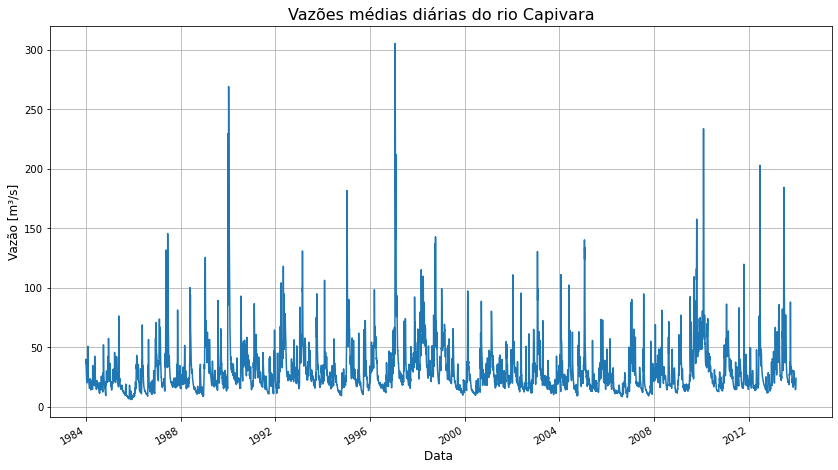

In [139]:
#Plotando as vazões médias diárias
plt.figure(figsize=(14,8))
my_data['TAQUARUCU (62)'].plot()
plt.ylabel('Vazão [m³/s]',fontsize=12)
plt.xlabel('Data ',fontsize=12)
plt.title('Vazões médias diárias do rio Capivara',fontsize=16)
plt.grid()

### Vazão média diária de longo termo (Qmlt)
A vazão média de longo termo é caracterizada estatisticamente por:
Qmlt = 1/𝑛𝑑 ∑ 𝑄𝑑



In [140]:
# qmlt = my_data['TAQUARUCU (62)'].mean()
print(f" A Qmlt é de {my_data['TAQUARUCU (62)'].mean():.2f} m³/s")
DP_qmlt = np.std(my_data['TAQUARUCU (62)'])
print(f" O Desvio padrão da vazão de longo termo é:")
print(f" DP = {DP_qmlt :.2f} m³/s ")
print(f' O coeficiente de variância para a vazão de longo termo é:')
print(f" CV= {DP_qmlt/qmlt :.2f}")

 A Qmlt é de 30.00 m³/s
 O Desvio padrão da vazão de longo termo é:
 DP = 20.85 m³/s 
 O coeficiente de variância para a vazão de longo termo é:
 CV= 0.69


### Vazões Máximas e mínimas diárias

In [10]:
Qmax_diaria  = my_data['TAQUARUCU (62)'].max()
Qmin_diaria = my_data['TAQUARUCU (62)'].min()
Amplitude_diaria = Qmax_diaria - Qmin_diaria
print(f'A vazão diária máxima registrada na série histórica: ')
print(f" Qmax = {my_data['TAQUARUCU (62)'].max():.2f} m³/s. ")
print(f'A vazão mínima registrada na série histórica:')
print(f" Qmin = {my_data['TAQUARUCU (62)'].min():.2f} m³/s")
print('A amplitude total de vazões médias diárias é:')
print(f' Amplitude = {Amplitude_diaria:.2f} m³/s')

A vazão diária máxima registrada na série histórica: 
 Qmax = 305.28 m³/s. 
A vazão mínima registrada na série histórica:
 Qmin = 6.10 m³/s
A amplitude total de vazões médias diárias é:
 Amplitude = 299.18 m³/s


### Histograma de vazões diárias

Text(0, 0.5, 'Frequência')

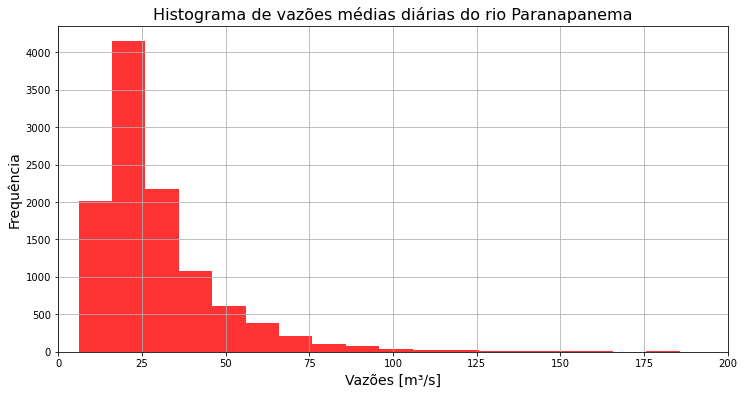

In [141]:
#Plotando o histograma
plt.figure(figsize=(12,6))
my_data['TAQUARUCU (62)'].plot.hist(bins=30,alpha=0.8,color='r',grid=True,xlim=(0,200))
plt.title('Histograma de vazões médias diárias do rio Paranapanema',fontsize=16)
plt.xlabel('Vazões [m³/s]',fontsize=14)
plt.ylabel('Frequência',fontsize=14)



 O máximo valor de frequência é 4147.0 e sua posição é 1 
 A moda dos intervalos de distribuição é: (16.07596983844475, 26.048577021815678) m³/s


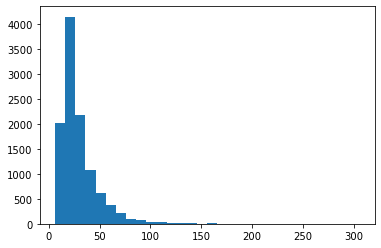

In [12]:
#Retirando valores do histograma
my_data.sort_values(by=['TAQUARUCU (62)'],ascending=False,inplace=True) #ordenando os valores em ordem decrescente
counts, bins, bars = plt.hist(data=my_data,x='TAQUARUCU (62)',bins=30)
big = None #maximo valor de frequencia
spott = None #posição do maximo valor de frequencia
for i, v in enumerate(counts): 
    if big is None or v > big:
        big=v
        spott=i

#Plotando os valores retirados do histograma 

print(f' O máximo valor de frequência é {big} e sua posição é {spott} ')

intervalo_classe = (bins[spott],bins[spott+1])

print(f' A moda dos intervalos de distribuição é: {intervalo_classe} m³/s')



### Curva de permanência das vazões médias diárias 

In [14]:
tabela = pd.DataFrame()
# Criando uma tabela com as classes e ocorrências retiradas do histograma, calculando a frequência e a frequência acumulada
tabela['Classe']=range(30,0,-1)
tabela['Limite Inferior']=np.flip(bins[:-1])
tabela['Limite Superior']=np.flip(bins[1:])
tabela['Ocorrências']=np.flip(counts)
tabela['Frequencia (%)'] = (tabela['Ocorrências']/(counts.sum()))*100
tabela['Frequencia acumulada'] = (tabela['Frequencia (%)'].cumsum())

tabela

,Classe,Limite Inferior,Limite Superior,Ocorrências,Frequencia (%),Frequencia acumulada
0,30,295.308971,305.281578,1.0,0.009126,0.009126
1,29,285.336364,295.308971,0.0,0.000000,0.009126
2,28,275.363757,285.336364,1.0,0.009126,0.018252
3,27,265.391149,275.363757,2.0,0.018252,0.036503
4,26,255.418542,265.391149,0.0,0.000000,0.036503
5,25,245.445935,255.418542,0.0,0.000000,0.036503
6,24,235.473328,245.445935,3.0,0.027377,0.063880
7,23,225.500721,235.473328,3.0,0.027377,0.091258
8,22,215.528114,225.500721,2.0,0.018252,0.109509
9,21,205.555506,215.528114,3.0,0.027377,0.136886


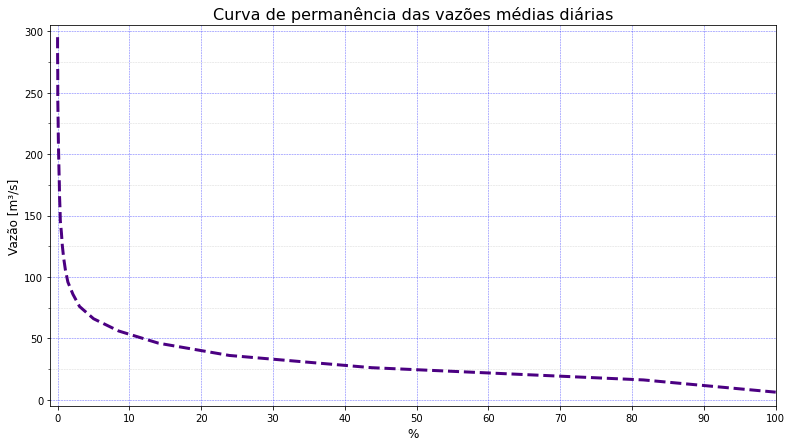

In [143]:
import matplotlib.ticker as plticker

#Plotando a curva de permanência 
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel('%',fontsize=12)
ax.set_ylabel('Vazão [m³/s]',fontsize=12)
ax.grid(True,color='b', alpha=0.6, linestyle='dashed', linewidth=0.5)
ax.grid(which='minor', alpha=0.5, linestyle ='dashed', linewidth=0.5)

plt.plot(tabela['Frequencia acumulada'],tabela['Limite Inferior'],color='Indigo', linestyle='--', linewidth=3)
plt.title('Curva de permanência das vazões médias diárias',fontsize=16)
loc = plticker.MultipleLocator(base=10) # este localizador poe os ticks em intervalos pré definidos
ax.xaxis.set_major_locator(loc)
ax.set_xlim(-1,100)
ax.set_ylim(-5,305)
locy = plticker.MultipleLocator(25)
ax.yaxis.set_minor_locator(locy)

In [144]:
# Encontrando resultados estatísticos a partir da curva de permanência dada pelos valores de vazão média diária

#mediana dos arrays de dados de vazão
mediana = my_data['TAQUARUCU (62)'].median()
#moda dos arrays de dados de vazão
from scipy.stats import mode
moda = mode(my_data['TAQUARUCU (62)'])


#Mostrando os resultados
print(f' A mediana dos valores médios diários de vazão é: {mediana:.2f} m³/s')
print(f" A Qmlt diária é de {my_data['TAQUARUCU (62)'].mean():.2f} m³/s")

#Encontrando a Q90%, Q95%, Q98%
Qalvo = 0
dicio_Qalvo = {}

for i in [90,95,98,50]:
    Qalvo = i #Encontrando a Q90
    ind = tabela.index[tabela['Frequencia acumulada']>=Qalvo] #encontrando o índice que se encontra a vazão de excedencia esperada
    #Aplicando regra de 3 para achar as vazões solicitadas 
    variacao_vazao = tabela['Limite Inferior'][ind[0]-1] - tabela['Limite Inferior'][ind[0]] #variação de vazão
    variacao_freq =  np.absolute(tabela['Frequencia acumulada'][ind[0]-1] - tabela['Frequencia acumulada'][ind[0]]) #variação de frequencia
    relativo_Qalvo = Qalvo - tabela['Frequencia acumulada'][ind[0]-1] #Para 90% 
    Q_encontrado = (relativo_Qalvo*variacao_vazao) / variacao_freq 
    Q_noventa = tabela['Limite Inferior'][ind[0]-1] - Q_encontrado 
    dicio_Qalvo[i]= Q_noventa
    


#Printando os resultados 
for k,v in dicio_Qalvo.items():
    print(f' Q{k}% é de {v:.2f} m3/s.')
   

 A mediana dos valores médios diários de vazão é: 24.05 m³/s
 A Qmlt diária é de 30.00 m³/s
 Q90% é de 11.52 m3/s.
 Q95% é de 8.81 m3/s.
 Q98% é de 7.19 m3/s.
 Q50% é de 24.40 m3/s.


# Valores médios mensais

In [17]:
#média movel de 7 dias centralizada.
media_movel_mensal = my_data['TAQUARUCU (62)'].rolling(window=7,center=True).mean()
#DataFrame pivô para retirar os valores de médias moveis mensais 
df1 = pd.DataFrame(media_movel_mensal)
df1.reset_index(inplace=True)
df1['mes']=df1['DATA'].apply(lambda x:x.month)



In [18]:
# Calculo da Q7 mínima e da Q7 máxima de cada mês
min_q7=ind_min_q7=max_q7=ind_max_q7=0
lista_minq7=[]
lista_ind_minq7=[]
lista_max_q7_mensal=[]
for m in range(1,13):
    #dados de Q7 mínimo mensais 
    min_q7 = df1[df1['mes']==m]['TAQUARUCU (62)'].min()
    ind_min_q7 = df1[df1['mes']==m]['TAQUARUCU (62)'].idxmin()
    data_minq7 = df1.iloc[ind_min_q7]['DATA']
    lista_minq7.append(min_q7)
    lista_ind_minq7.append(data_minq7)
    #dados de Q7 máximas mensais
    max_q7 = df1[df1['mes']==m]['TAQUARUCU (62)'].max()
    lista_max_q7_mensal.append(max_q7)

In [19]:
## Calculo do Q médio mensal e média das médias mensais

#dataframe com os valores de vazões 
df2 = dados[['ANO','MES','DIA','DATA','TAQUARUCU (62)']].copy()
lista_anos = list(df2['ANO'].value_counts().index.sort_values()) #criando uma lista com os anos existentes nos dados

#Calculando as médias mensais de cada ano e armazenando em um data frame
media_mensal_porano=media_mensal_datas=std_media_mensal_porano=0
lista_media_mensal_porano=[]
lista_media_mensal_datas=[]
lista_std_media_mensal_porano=[]
for ano in lista_anos:
    df_filtro = df2[df2['ANO']==ano]
    for m in range(1,13):
        media_mensal_porano = df_filtro[df_filtro['MES']==m]['TAQUARUCU (62)'].mean()
        std_media_mensal_porano = np.std(df_filtro[df_filtro['MES']==m]['TAQUARUCU (62)']) #calcula aqui o std de cada mes 
        media_mensal_datas = (m,ano)
        lista_media_mensal_porano.append(media_mensal_porano)
        lista_media_mensal_datas.append(media_mensal_datas)
        lista_std_media_mensal_porano.append(std_media_mensal_porano)
        
#Criando um dataframe para armazenar as variáveis das vazões médias mensais
df2_mensal = pd.DataFrame(data=lista_media_mensal_datas, columns=['mes','ano'])
df2_mensal['Q mensal media'] = lista_media_mensal_porano
df2_mensal['mes'] = (pd.to_datetime(df2_mensal['mes'],format='%m')).apply(lambda x:x.month)
df2_mensal['ano'] = (pd.to_datetime(df2_mensal['ano'],format ='%Y')).apply(lambda x:x.year)
df2_mensal['std Q mensal media'] = lista_std_media_mensal_porano
#df2_mensal.drop(['ano','mes'],axis=1,inplace=True)

#Calculando a média das vazões médias mensais (média das médias)
lista_mensal_media=[]
lista_std_std_mensal_media=[]
for m in range(1,13,1):
    mensal_media_media = df2_mensal[df2_mensal['mes']==m]['Q mensal media'].mean()
    lista_mensal_media.append(mensal_media_media)
    std_std_mensal_media = np.std(df2_mensal[df2_mensal['mes']==m]['Q mensal media']) #calculando o std dos std mensais 
    lista_std_std_mensal_media.append(std_std_mensal_media)

In [20]:
# Calculando o Q máximo mensal 
max_mensal_porano=max_mensal_datas=0
lista_max_mensal_porano=[]
lista_max_mensal_datas=[]
for ano in lista_anos:
    df_filtro = df2[df2['ANO']==ano]
    for m in range(1,13):
        max_mensal_porano = df_filtro[df_filtro['MES']==m]['TAQUARUCU (62)'].max()
        max_mensal_datas = (m,ano)
        lista_max_mensal_porano.append(max_mensal_porano)
        lista_max_mensal_datas.append(max_mensal_datas)

#Criando um dataframe para armazenar as variáveis das vazões máximas mensais
df2_mensal_max = pd.DataFrame(data=lista_max_mensal_datas, columns=['mes','ano'])
df2_mensal_max['Q max mensal'] = lista_max_mensal_porano

#Calculando a máxima das vazões máximas mensais (média das médias)
max_mensal=0
lista_max_mensal=[]
lista_ind_max_mensal=[]
for m in range(1,13,1):
    max_mensal = df2_mensal_max[df2_mensal_max['mes']==m]['Q max mensal'].max()
    ind_max_mensal = df2_mensal_max[df2_mensal_max['mes']==m]['Q max mensal'].idxmax()
    out_ind_max_mensal = df2_mensal_max.iloc[ind_max_mensal]['ano']
    lista_max_mensal.append(max_mensal)
    lista_ind_max_mensal.append(out_ind_max_mensal)
    


In [21]:
tabela_mensal=pd.DataFrame(index=['Janeiro','Fevereiro','Março','Abril','Maio','Junho',
                                  'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])

In [22]:
tabela_mensal['Q7 minima']=lista_minq7
tabela_mensal['data Q7 minima']=lista_ind_minq7
tabela_mensal['Ano Q7 minima']=tabela_mensal['data Q7 minima'].apply(lambda x:x.year)
tabela_mensal['Q médio'] = lista_mensal_media
tabela_mensal['Std Q médio'] = lista_std_std_mensal_media
tabela_mensal['CV Q médio'] = tabela_mensal['Std Q médio']/tabela_mensal['Q médio']
tabela_mensal['Q maximo'] = lista_max_mensal
tabela_mensal['Ano Q maxima']=lista_ind_max_mensal
tabela_mensal['Ano Q maxima'] = pd.to_datetime(tabela_mensal['Ano Q maxima'].map('{:.0f}'.format), format='%Y')
tabela_mensal['Ano Q maxima'] = tabela_mensal['Ano Q maxima'].apply(lambda x:x.year)
tabela_mensal['Q7 max mensal'] = lista_max_q7_mensal

#Tabela com os dados de vazão mensal  
tabela_mensal.drop('data Q7 minima',axis=1)

,Q7 minima,Ano Q7 minima,Q médio,Std Q médio,CV Q médio,Q maximo,Ano Q maxima,Q7 max mensal
Janeiro,8.249101,1986,43.590335,27.510761,0.631121,305.281578,1997,262.451077
Fevereiro,11.723772,1986,44.950290,18.860939,0.419595,233.674840,2010,233.496569
Março,14.167710,1984,33.775160,12.210938,0.361536,115.192462,1998,115.276735
Abril,12.268310,2006,28.247275,12.748038,0.451302,109.747082,1998,109.837839
Maio,10.981515,1986,28.254590,12.202190,0.431866,131.778180,1987,131.937003
Junho,9.636377,2000,29.445183,15.999756,0.543374,202.908447,2012,199.142060
Julho,10.624972,1986,26.131941,10.557066,0.403991,108.884897,2013,108.936758
Agosto,8.463027,2006,22.069425,7.999239,0.362458,89.417666,1989,89.450079
Setembro,8.693159,1985,24.170299,12.357863,0.511283,136.928601,1998,136.361374
Outubro,6.806724,1985,29.045561,16.460089,0.566699,157.689109,2009,158.321162


### Gráficos mensais

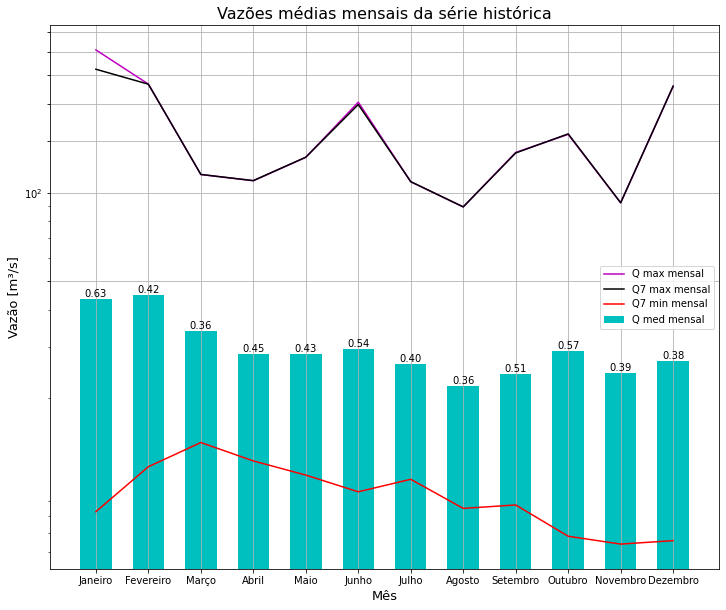

In [153]:
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize=(12,10))


ax.bar(tabela_mensal.index,tabela_mensal['Q médio'],width=0.6,label='Q med mensal',color='c')
for i in range(len(tabela_mensal.index)):
               ax.text(i,tabela_mensal['Q médio'][i],'{:.2f}'.format(tabela_mensal['CV Q médio'][i]),ha='center',va='bottom',)
ax.plot(tabela_mensal.index,tabela_mensal['Q maximo'],label='Q max mensal',color='m')
ax.plot(tabela_mensal.index,tabela_mensal['Q7 max mensal'],label='Q7 max mensal',color='k')
ax.plot(tabela_mensal.index,tabela_mensal['Q7 minima'],label='Q7 min mensal',color='r')

plt.title('Vazões médias mensais da série histórica',fontsize=16)
plt.ylabel('Vazão [m³/s]',fontsize=13)
plt.xlabel('Mês',fontsize=13)

ax.legend()

plt.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.set_yscale('log')
locy = plticker.MultipleLocator(base=50)
ax.yaxis.set_major_locator(locy)



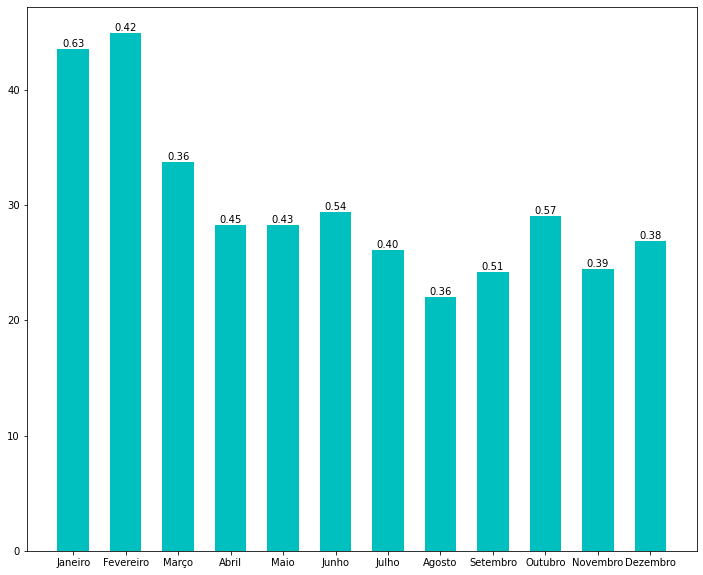

In [24]:
fig, ax = plt.subplots(figsize=(12,10))


ax.bar(tabela_mensal.index,tabela_mensal['Q médio'],width=0.6,label='Q med mensal',color='c')
for i in range(len(tabela_mensal.index)):
               ax.text(i,tabela_mensal['Q médio'][i],'{:.2f}'.format(tabela_mensal['CV Q médio'][i]),ha='center',va='bottom')

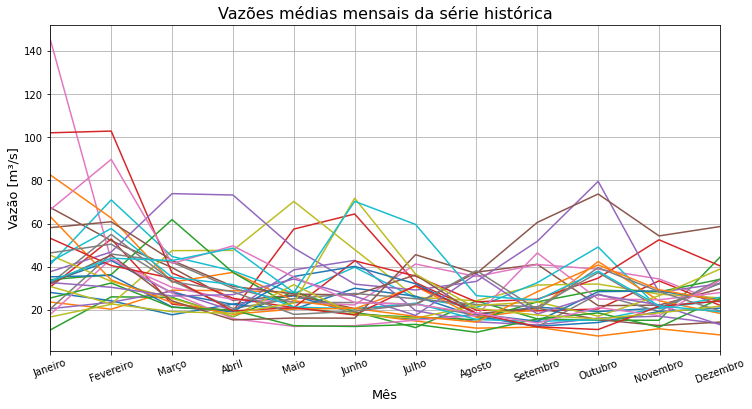

In [25]:
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
fig, ax = plt.subplots(figsize=(12,6))
for ano in lista_anos:
    ax.plot(df2_mensal[df2_mensal['ano']==ano]['mes'],df2_mensal[df2_mensal['ano']==ano]['Q mensal media'])
    
plt.title('Vazões médias mensais da série histórica',fontsize=16)
plt.ylabel('Vazão [m³/s]',fontsize=13)
plt.xlabel('Mês',fontsize=13)

plt.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.set_xlim(1,12)

positions = list(range(1,13))
mystick = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho',
                                  'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']
  
ax.xaxis.set_major_locator(plticker.FixedLocator(positions))
ax.xaxis.set_major_formatter(plticker.FixedFormatter(mystick))
ax.xaxis.set_tick_params(labelrotation=20)


Text(0.5, 1.0, 'Vazões Q7 mínimas mensais')

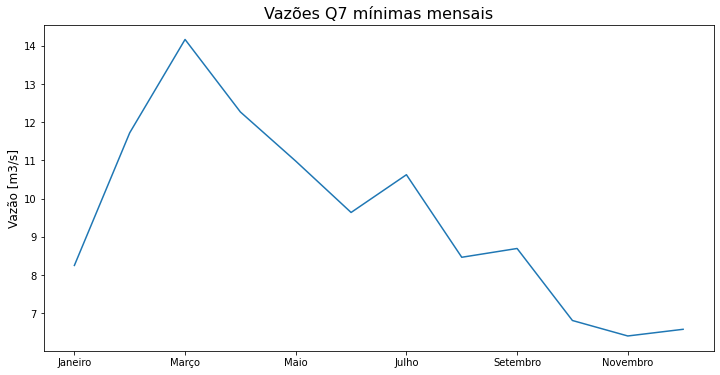

In [26]:
plt.figure(figsize=(12,6))
tabela_mensal['Q7 minima'].plot(kind='line')
plt.ylabel('Vazão [m3/s]',fontsize=12)
plt.title('Vazões Q7 mínimas mensais',fontsize=16)

Text(0.5, 1.0, 'Vazões máximas mensais')

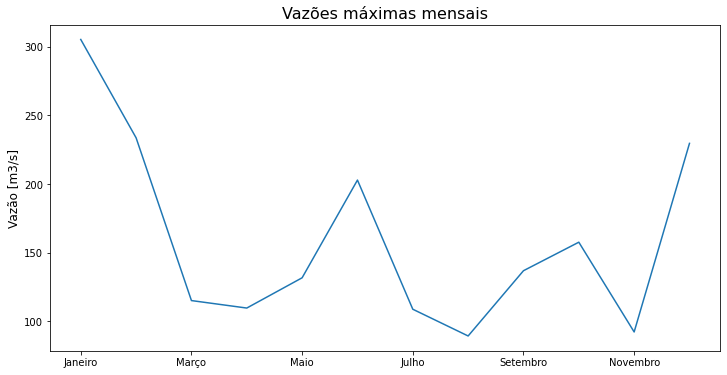

In [27]:
plt.figure(figsize=(12,6))
tabela_mensal['Q maximo'].plot(kind='line')
plt.ylabel('Vazão [m3/s]',fontsize=12)
plt.title('Vazões máximas mensais',fontsize=16)

Text(0.5, 1.0, 'Vazões médias mensais')

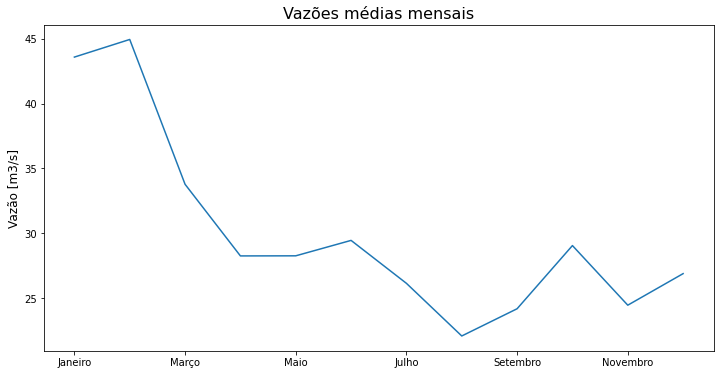

In [28]:
plt.figure(figsize=(12,6))
tabela_mensal['Q médio'].plot(kind='line')
plt.ylabel('Vazão [m3/s]',fontsize=12)
plt.title('Vazões médias mensais',fontsize=16)

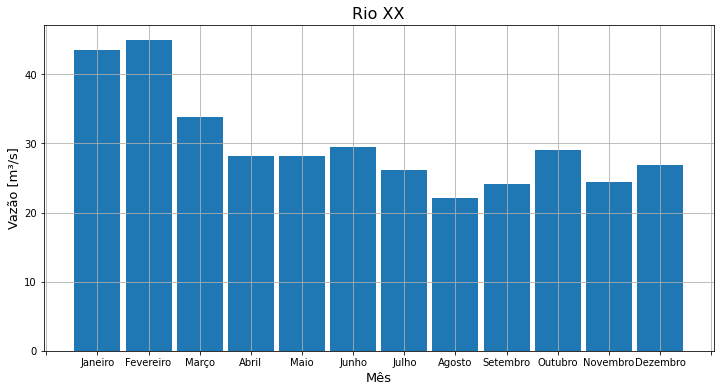

In [29]:
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(tabela_mensal.index,tabela_mensal['Q médio'],width=0.9)

plt.title('Rio XX',fontsize=16)
plt.ylabel('Vazão [m³/s]',fontsize=13)
plt.xlabel('Mês',fontsize=13)

plt.grid(True)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)




### Curva de Permanência dos valores médios mensais

In [65]:
#Calculando o número de classes para o histograma 
k_mensal = 1 + 3.3*(np.log10(len(df2_mensal['Q mensal media'])))
print(f' O número de classes para o histograma é: {k_mensal:.2f}')

#Numero de classes adotado
bins_mensal=10

 O número de classes para o histograma é: 9.44


Text(0, 0.5, 'Frequência')

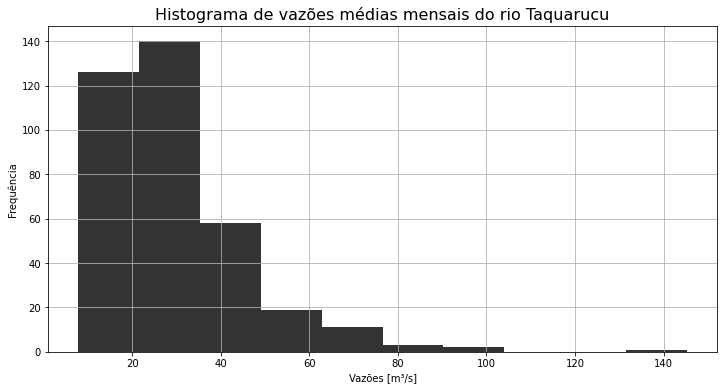

In [66]:
#Plotando o histograma
plt.figure(figsize=(12,6))
df2_mensal['Q mensal media'].plot.hist(bins=bins_mensal,alpha=0.8,color='k',grid=True)
#my_data['TAQUARUCU (62)'].plot.hist(bins=30,alpha=0.8,color='r',grid=True,xlim=(0,200))
plt.title('Histograma de vazões médias mensais do rio Taquarucu',fontsize=16)
plt.xlabel('Vazões [m³/s]')
plt.ylabel('Frequência')


 O máximo valor de frequência é 140.0 e sua posição é 1 
 A moda dos intervalos de distribuição é: (21.57973084674337, 35.32367795620166) m³/s


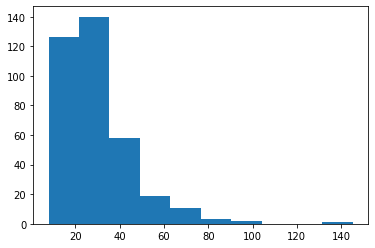

In [67]:
#Retirando valores do histograma
df2_mensal.sort_values(by=['Q mensal media'],ascending=False,inplace=True) #ordenando os valores em ordem decrescente
counts_m, bins_m, bars_m = plt.hist(data=df2_mensal,x='Q mensal media',bins=bins_mensal)
big_m = None #maximo valor de frequencia
spott_m = None #posição do maximo valor de frequencia
for i, v in enumerate(counts_m): 
    if big_m is None or v > big_m:
        big_m=v
        spott_m=i

#Plotando os valores retirados do histograma 

print(f' O máximo valor de frequência é {big_m} e sua posição é {spott_m} ')

intervalo_classe_m = (bins_m[spott_m],bins_m[spott_m+1])

print(f' A moda dos intervalos de distribuição é: {intervalo_classe_m} m³/s')


In [68]:
tabela_perm_mes = pd.DataFrame()
# Criando uma tabela com as classes e ocorrências retiradas do histograma, calculando a frequência e a frequência acumulada
tabela_perm_mes['Classe']=range(len(bins_m)-1,0,-1)
tabela_perm_mes['Limite Inferior']=np.flip(bins_m[:-1])
tabela_perm_mes['Limite Superior']=np.flip(bins_m[1:])
tabela_perm_mes['Ocorrências']=np.flip(counts_m)
tabela_perm_mes['Frequencia (%)'] = (tabela_perm_mes['Ocorrências']/(counts_m.sum()))*100
tabela_perm_mes['Frequencia acumulada'] = (tabela_perm_mes['Frequencia (%)'].cumsum())

tabela_perm_mes

,Classe,Limite Inferior,Limite Superior,Ocorrências,Frequencia (%),Frequencia acumulada
0,10,131.531308,145.275255,1.0,0.277778,0.277778
1,9,117.787361,131.531308,0.0,0.000000,0.277778
2,8,104.043414,117.787361,0.0,0.000000,0.277778
3,7,90.299466,104.043414,2.0,0.555556,0.833333
4,6,76.555519,90.299466,3.0,0.833333,1.666667
5,5,62.811572,76.555519,11.0,3.055556,4.722222
6,4,49.067625,62.811572,19.0,5.277778,10.000000
7,3,35.323678,49.067625,58.0,16.111111,26.111111
8,2,21.579731,35.323678,140.0,38.888889,65.000000
9,1,7.835784,21.579731,126.0,35.000000,100.000000


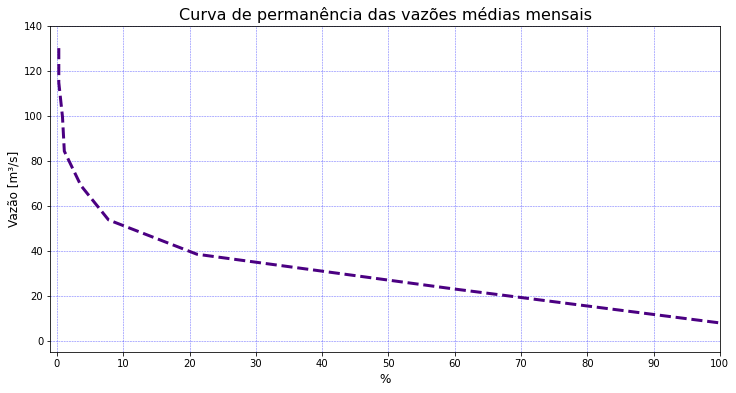

In [57]:
import matplotlib.ticker as plticker

#Plotando a curva de permanência 
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('%',fontsize=12)
ax.set_ylabel('Vazão [m³/s]',fontsize=12)
ax.grid(True,color='b', alpha=0.6, linestyle='dashed', linewidth=0.5)
ax.grid(which='minor', alpha=0.5, linestyle ='dashed', linewidth=0.5)

plt.plot(tabela_perm_mes['Frequencia acumulada'],tabela_perm_mes['Limite Inferior'],color='Indigo', linestyle='--', linewidth=3)
plt.title('Curva de permanência das vazões médias mensais',fontsize=16)
loc = plticker.MultipleLocator(base=10) # este localizador poe os ticks em intervalos pré definidos
ax.xaxis.set_major_locator(loc)
ax.set_xlim(-1,100)
ax.set_ylim(-5,140)
locy = plticker.MultipleLocator(20)
ax.yaxis.set_minor_locator(locy)


In [138]:
# Encontrando resultados estatísticos a partir da curva de permanência dada pelos valores de vazão média diária

#mediana dos arrays de dados de vazão
mediana_m = df2_mensal['Q mensal media'].median()


#Mostrando os resultados
print(f' A mediana dos valores médios mensais de vazão é: {mediana_m:.2f} m³/s')
print(f" A Qmlt mensal é de {df2_mensal['Q mensal media'].mean():.2f} m³/s")

#Encontrando a Q90%, Q95%, Q98%
Qalvo_mes = 0
dicio_Qalvo_mes = {}

for i in [90,95,98,50]:
    Qalvo_mes = i #Encontrando a Q90
    ind_mes = tabela_perm_mes.index[tabela_perm_mes['Frequencia acumulada']>=Qalvo] #encontrando o índice que se encontra a vazão de excedencia esperada
    ind_mes=ind_mes.max() if len(ind_mes)> 1 else ind_mes
    #Aplicando regra de 3 para achar as vazões solicitadas 
    variacao_vazao_mes = np.absolute(tabela_perm_mes['Limite Inferior'][ind_mes-1] - tabela_perm_mes['Limite Inferior'][ind_mes]) #variação de vazão
    variacao_freq_mes =  np.absolute(tabela_perm_mes['Frequencia acumulada'][ind_mes-1] - tabela_perm_mes['Frequencia acumulada'][ind_mes]) #variação de frequencia
    relativo_Qalvo_mes = Qalvo_mes - tabela_perm_mes['Frequencia acumulada'][ind_mes-1] #Para 90% 
    Q_encontrado_mes = (relativo_Qalvo_mes*variacao_vazao_mes) / variacao_freq_mes 
    Q_noventa = tabela_perm_mes['Limite Inferior'][ind_mes-1] - Q_encontrado_mes 
    dicio_Qalvo_mes[i]= Q_noventa
    


#Printando os resultados 
for k,v in dicio_Qalvo_mes.items():
    print(f' Q{k}% é de {v:.2f} m3/s.')
   

 A mediana dos valores médios mensais de vazão é: 25.49 m³/s
 A Qmlt mensal é de 30.08 m³/s
 Q90% é de 11.76 m3/s.
 Q95% é de 9.80 m3/s.
 Q98% é de 8.62 m3/s.
 Q50% é de 27.47 m3/s.


# Valores anuais
### Média movel de 7 dias 
Valores anuais

In [30]:
#Vazões mínimas anuais 
# Rearranjando os dados
anos_coluna = my_data['ANO'].value_counts(sort=False).index.sort_values().to_list() #criando uma coluna com os anos
#calculando a média móvel de 7 dias e retirando o valor mínimo
anos_dicio = {}
lista_ind_min_movel = []
lista_ind_max_movel=[]
lista_max_movel=[]
lista_media_media=[]
min_media_movel_anual=max_media_movel_anual=med_media_movel_anual=0


for a in anos_coluna:
    media_movel_anual = my_data[my_data['ANO']==a]['TAQUARUCU (62)'].rolling(window=7).mean()
    #valores Q7 mínimos anuais
    min_media_movel_anual = media_movel_anual.min()
    ind_min_media_movel_anual = media_movel_anual.idxmin()
    lista_ind_min_movel.append(ind_min_media_movel_anual)
    anos_dicio[a]=min_media_movel_anual
    #valores Q7 máximos anuais
    max_media_movel_anual = media_movel_anual.max()
    lista_max_movel.append(max_media_movel_anual)
    ind_max_media_movel_anual = media_movel_anual.idxmax()
    lista_ind_max_movel.append(ind_max_media_movel_anual)
    #media das Q7 médias anuais
    med_media_movel_anual=media_movel_anual.mean()
    lista_media_media.append(med_media_movel_anual)
    

   

In [31]:
#Calculando a vazão anual média e máxima

#Calculando as médias mensais de cada ano e armazenando em um data frame
media_anual_porano=max_anual=ind_max_anual=std_media_anual=0
lista_media_anual=[]
lista_max_anual=[]
lista_ind_max_anual=[]
lista_std_media_anual=[]
for ano in lista_anos:
    #Media anual para cada ano da série
    media_anual_porano = df2[df2['ANO']==ano]['TAQUARUCU (62)'].mean()
    std_media_anual = np.std(df2[df2['ANO']==ano]['TAQUARUCU (62)'])
    lista_media_anual.append(media_anual_porano)
    lista_std_media_anual.append(std_media_anual)
    #Máxima anual para cada ano da série história e mês da máxima anual 
    max_anual = df2[df2['ANO']==ano]['TAQUARUCU (62)'].max()
    ind_max_anual = df2[df2['ANO']==ano]['TAQUARUCU (62)'].idxmax()
    mes_max_anual = df2.iloc[ind_max_anual]['MES']
    lista_max_anual.append(max_anual)
    lista_ind_max_anual.append(mes_max_anual)


In [32]:
tabela_anual = pd.DataFrame(list(anos_dicio.items()),columns = ['ano','Q7 minima']) 
tabela_anual['data Q7 min'] = lista_ind_min_movel
tabela_anual['Mês da Q7 min'] = tabela_anual['data Q7 min'].apply(lambda time: time.month)
tabela_anual['Q7 média anual'] = lista_media_media
tabela_anual['Q7 max'] = lista_max_movel
tabela_anual['data Q7 max'] = lista_ind_max_movel
tabela_anual['Mês da Q7 max'] = tabela_anual['data Q7 max'].apply(lambda time: time.month)
tabela_anual['Q médio anual'] = lista_media_anual
tabela_anual['Std Q medio anual'] = lista_std_media_anual
tabela_anual['CV Q medio anual'] = tabela_anual['Std Q medio anual']/tabela_anual['Q médio anual']
tabela_anual['Q máx anual'] = lista_max_anual
tabela_anual['Mês da Q max'] = lista_ind_max_anual

tabela_anual.set_index('ano',inplace=True)
tabela_anual

,Q7 minima,data Q7 min,Mês da Q7 min,Q7 média anual,Q7 max,data Q7 max,Mês da Q7 max,Q médio anual,Std Q medio anual,CV Q medio anual,Q máx anual,Mês da Q max
ano,,,,,,,,,,,,
1984,10.433736,1984-11-03,11,21.879224,51.478282,1984-12-18,12,22.041884,8.081530,0.366644,57.562197,12
1985,6.401562,1985-11-21,11,17.557981,54.226902,1985-04-19,4,17.829888,9.647658,0.541095,76.348756,5
1986,8.492199,1986-01-10,1,20.817561,64.122583,1986-08-25,8,21.099291,12.379947,0.586747,70.835309,12
1987,14.041300,1987-05-02,5,32.060528,126.122116,1987-06-16,6,32.751781,21.512562,0.656836,145.663897,6
1988,9.069150,1988-12-13,12,21.786370,88.542516,1988-05-30,5,22.277329,13.923158,0.624992,100.194979,5
1989,13.947302,1989-12-10,12,32.848796,137.667617,1989-01-18,1,33.713611,22.250709,0.659992,229.636184,12
1990,15.470712,1990-12-31,12,40.598132,228.676760,1990-01-16,1,42.083831,37.169645,0.883229,269.115184,1
1991,11.107926,1991-09-24,9,26.075108,74.157639,1991-12-22,12,26.396911,12.928689,0.489780,86.694977,2
1992,12.073832,1992-01-25,1,34.478471,104.677694,1992-05-15,5,34.912358,18.707909,0.535853,118.142042,5


(1983.0, 2014.0)

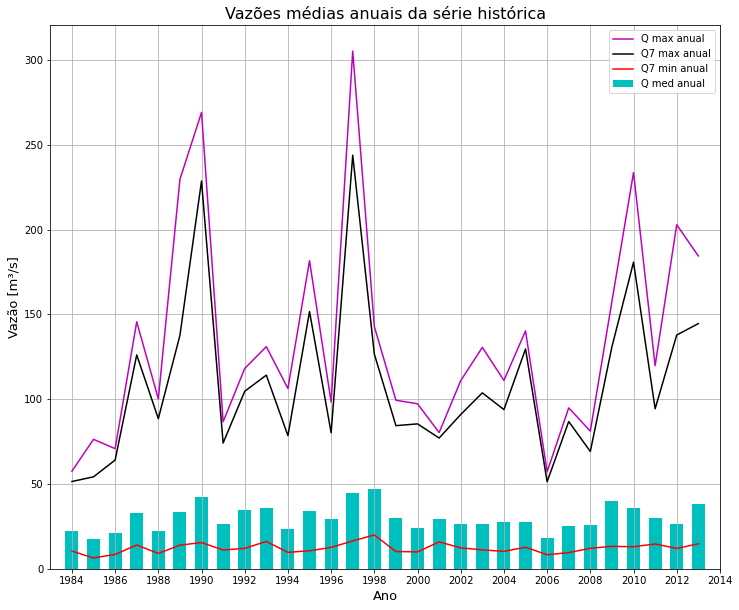

In [33]:
import matplotlib.dates as mdates
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(12,10))


ax.bar(tabela_anual.index,tabela_anual['Q médio anual'],width=0.6,label='Q med anual',color='c')
#for i in range(len(tabela_anual.index)):
 #   ax.text(i,tabela_anual['Q médio anual'][i],'{:.2f}'.format(tabela_anual['CV Q medio anual'][i]),ha='center',va='bottom')
ax.plot(tabela_anual.index,tabela_anual['Q máx anual'],label='Q max anual',color='m')
ax.plot(tabela_anual.index,tabela_anual['Q7 max'],label='Q7 max anual',color='k')
#ax.plot(tabela_anual.index,tabela_anual['Q7 média anual'],label='Q7 media anual',color='b')
ax.plot(tabela_anual.index,tabela_anual['Q7 minima'],label='Q7 min anual',color='r')

plt.title('Vazões médias anuais da série histórica',fontsize=16)
plt.ylabel('Vazão [m³/s]',fontsize=13)
plt.xlabel('Ano',fontsize=13)

ax.legend()

plt.grid(True)
loc = plticker.MultipleLocator(base=2.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

ax.set_xlim(1983,2014)
#locy = plticker.MultipleLocator(base=25)
#ax.yaxis.set_major_locator(locy)



<BarContainer object of 30 artists>

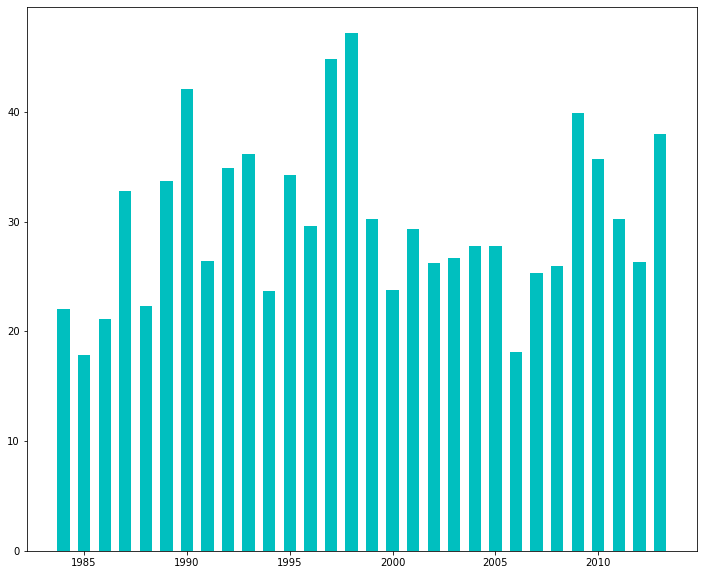

In [34]:
fig, ax = plt.subplots(figsize=(12,10))


ax.bar(tabela_anual.index,tabela_anual['Q médio anual'],width=0.6,label='Q med anual',color='c')
#for i in range(198):
    #ax.text(i,tabela_anual['Q médio anual'][i],"{:.2f}".format(tabela_anual['CV Q medio anual'][i]),ha='center',va='bottom')

KeyError: 0

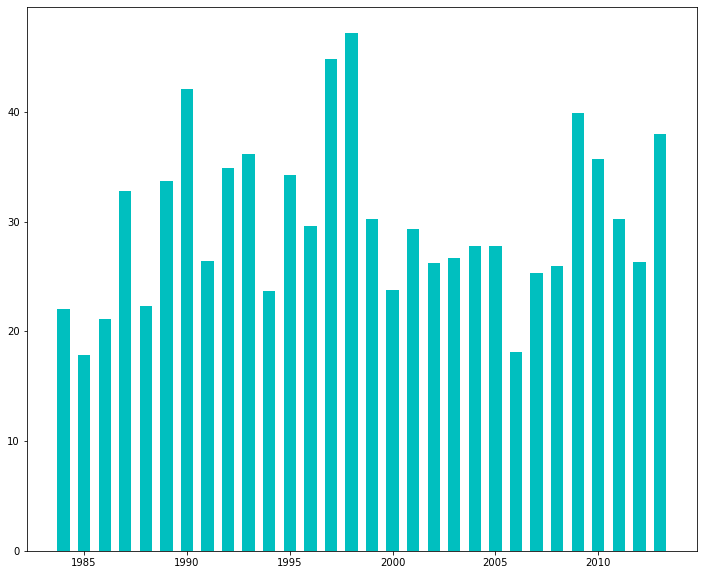

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
x=tabela_anual.index
y=tabela_anual['Q médio anual']
ax.bar(x,y,width=0.6,label='Q med anual',color='c')
for i in range(0,30,1):
    ax.text(i,y[i],y[i])